# 과제 3 - 기상에 따른 화재 발생에 관한 상관분석

In [1]:
# 한글폰트 사용 in colab
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#!apt-get update -qq
#!apt-get install fonts-nanum* -qq
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf""

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,434 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and dire

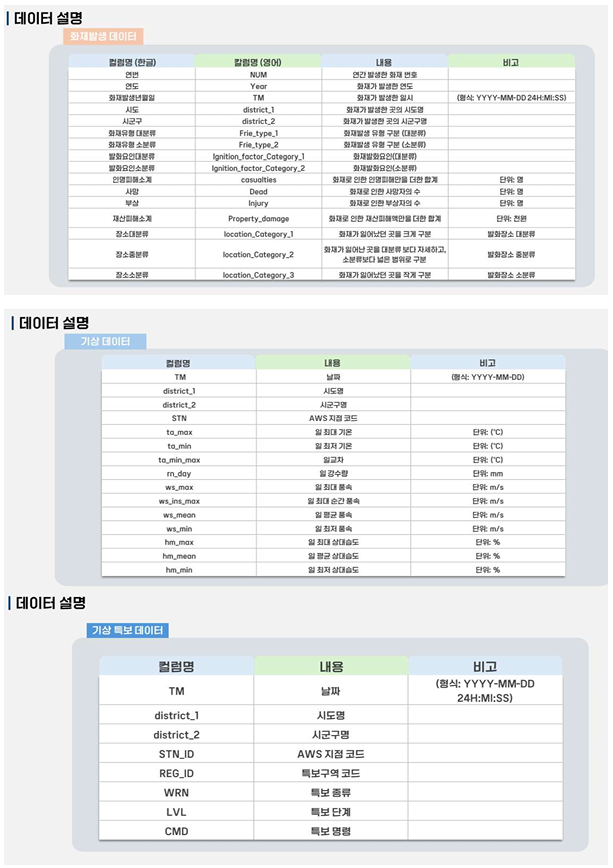

## 1. 데이터 전처리

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import pandas as pd

drive.mount('/content/drive', force_remount=True)

PATH = "/content/drive/MyDrive/공모전/날씨빅데이터/"

Mounted at /content/drive


In [3]:
df = pd.read_parquet(PATH+'[2024년 날씨 빅데이터 콘테스트]/[과제3] 기상현상과 화재발생에 대한 상관분석/task3_all_region_data.parquet')

In [4]:
df.head()

,지점_AWS,지점명_AWS,일시,기온(°C)_AWS,풍향(deg)_AWS,풍속(m/s)_AWS,강수량(mm)_AWS,현지기압(hPa)_AWS,해면기압(hPa)_AWS,습도(%)_AWS,...,지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),district_1,district_2
0,589,고양고봉,2018-01-01 00:00:00,-5.6,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,-3.9,0.0,NaN,NaN,NaN,NaN,경기도,파주시
1,589,고양고봉,2018-01-01 01:00:00,-5.9,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,-4.2,0.0,NaN,NaN,NaN,NaN,경기도,파주시
2,589,고양고봉,2018-01-01 02:00:00,-6.2,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,-4.4,0.0,NaN,NaN,NaN,NaN,경기도,파주시
3,589,고양고봉,2018-01-01 03:00:00,-6.5,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,-4.6,0.0,NaN,NaN,NaN,NaN,경기도,파주시
4,589,고양고봉,2018-01-01 04:00:00,-7.2,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,-4.8,0.0,NaN,NaN,NaN,NaN,경기도,파주시


In [5]:
df.shape

(11756613, 68)

In [6]:
!pip install geopandas -q
!pip install mapclassify -q
!pip install pysal -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 78.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from geopy.distance import geodesic
from pyproj import Transformer

# 패키지 호출
import pandas as pd
import geopandas as gpd
import folium
from google.colab import files
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

import libpysal as lps
import esda

from splot.esda import plot_moran, moran_scatterplot, lisa_cluster
from esda.moran import Moran, Moran_Local

In [8]:
# train, test 데이터셋 결측치 보간 함수
def interpolate_missing_values(train, test, columns):
    for column in columns:
        if train[column].isna().sum() > 0:
            # Create interpolation model using training data
            train_non_null = train[train[column].notnull()]
            train_index = np.array(train_non_null.index).reshape(-1, 1)
            train_values = train_non_null[column].values
            model = LinearRegression().fit(train_index, train_values)

            # Apply model to training data
            train_null_index = np.array(train[train[column].isnull()].index).reshape(-1, 1)
            if len(train_null_index) > 0:
                train.loc[train[column].isnull(), column] = model.predict(train_null_index)

            # Apply model to testing data
            test_null_index = np.array(test[test[column].isnull()].index).reshape(-1, 1)
            if len(test_null_index) > 0:
                test.loc[test[column].isnull(), column] = model.predict(test_null_index)

    return train, test

In [ ]:
from scipy.spatial import cKDTree

def calculate_uhi_intensity(train, test):

    # 1. 지역과 도시지역비율 매핑
    df_region = pd.read_csv(PATH+"data/지역_중심좌표_AWS위경도.csv")
    city_noncity_area_status = pd.read_csv(PATH+'data/도시·비도시지역_면적현황_20240517234507.csv')

    city_noncity_area_status.rename(columns={
        '소재지(시군구)별(1)': 'fire_firefighting.district_1',
        '소재지(시군구)별(2)': 'fire_firefighting.district_2_2',
        '2022.4': '도시지역비율'
    }, inplace=True)

    city_noncity_area_status['fire_firefighting.district_1'] = city_noncity_area_status['fire_firefighting.district_1'].str.replace('전라북도', '전북특별자치도')
    city_noncity_area_status['fire_firefighting.district_1'] = city_noncity_area_status['fire_firefighting.district_1'].str.replace('강원도', '강원특별자치도')
    city_noncity_area_status['fire_firefighting.district_2_2'] = city_noncity_area_status['fire_firefighting.district_2_2'].replace('세종특별자치시', '세종특별자치시')
    city_noncity_area_status.loc[city_noncity_area_status['fire_firefighting.district_2_2'] == '군위군', 'fire_firefighting.district_1'] = '대구광역시'

    df_area_adn_fire_fighting_weather = pd.merge(
        df_region,
        city_noncity_area_status,
        left_on=['fire_weather.district_1', 'fire_weather.district_2'],
        right_on=['fire_firefighting.district_1', 'fire_firefighting.district_2_2'],
        how='left'
    )


    df_area_adn_fire_fighting_weather['X_coord'] = df_area_adn_fire_fighting_weather['X']
    df_area_adn_fire_fighting_weather['Y_coord'] = df_area_adn_fire_fighting_weather['Y']

    # Convert '도시지역비율' to numeric, forcing errors to NaN
    df_area_adn_fire_fighting_weather['도시지역비율'] = pd.to_numeric(df_area_adn_fire_fighting_weather['도시지역비율']) # , errors='coerce')

    # Create a unique table of 시/도 정보
    unique_regions = df_area_adn_fire_fighting_weather[['fire_weather.district_1', 'fire_weather.district_2', '도시지역비율', 'X_coord', 'Y_coord', 'AWS지점']].drop_duplicates()

    # 2. 인근 비도시 지역 매핑
    # 50퍼 이상을 도시 / 50퍼 이하를 농촌
    above_50 = unique_regions[unique_regions['도시지역비율'] > 50].copy()
    below_or_equal_50 = unique_regions[unique_regions['도시지역비율'] <= 50].copy()

    below_tree = cKDTree(below_or_equal_50[['X_coord', 'Y_coord']].values)
    distances_above, indices_above = below_tree.query(above_50[['X_coord', 'Y_coord']].values, k=3)
    for i in range(3):
        above_50[f'nearest_stn_{i+1}'] = below_or_equal_50.iloc[indices_above[:, i]]['AWS지점'].values

    nearest_stns_below = []
    for index, row in below_or_equal_50.iterrows():
        distances, indices = below_tree.query([row[['X_coord', 'Y_coord']]], k=below_or_equal_50.shape[0])
        filtered_indices = [idx for idx in indices[0] if below_or_equal_50.iloc[idx]['도시지역비율'] < row['도시지역비율']]
        nearest_indices = filtered_indices[:3] if len(filtered_indices) >= 3 else filtered_indices + [None] * (3 - len(filtered_indices))
        nearest_stns_below.append(nearest_indices)

    for i in range(3):
        below_or_equal_50[f'nearest_stn_{i+1}'] = [below_or_equal_50.iloc[idx]['AWS지점'] if idx is not None else None for idx in [stns[i] for stns in nearest_stns_below]]

    df_merged = df_area_adn_fire_fighting_weather.copy()

    for i in range(3):
        df_merged = df_merged.merge(
            above_50[['fire_weather.district_1', 'fire_weather.district_2', f'nearest_stn_{i+1}']],
            on=['fire_weather.district_1', 'fire_weather.district_2'],
            how='left'
        )

    for i in range(3):
        below_data = below_or_equal_50[['fire_weather.district_1', 'fire_weather.district_2', f'nearest_stn_{i+1}']]
        below_data = below_data.rename(columns={f'nearest_stn_{i+1}': f'nearest_stn_{i+1}_below'})
        df_merged = pd.merge(
            df_merged,
            below_data,
            on=['fire_weather.district_1', 'fire_weather.district_2'],
            how='left'
        )

    for i in range(3):
        df_merged[f'nearest_stn_{i+1}'] = df_merged[f'nearest_stn_{i+1}'].combine_first(df_merged[f'nearest_stn_{i+1}_below'])
        df_merged.drop(columns=[f'nearest_stn_{i+1}_below'], inplace=True)

    print(df_merged.isna().sum())

    # Find the rows with NaN values in 'nearest_stn_' columns
    nan_indices_1 = df_merged[df_merged['nearest_stn_1'].isna()].index
    nan_indices_2 = df_merged[df_merged['nearest_stn_2'].isna()].index
    nan_indices_3 = df_merged[df_merged['nearest_stn_3'].isna()].index

    # Fill NaN values in 'nearest_stn_' columns with their own 'AWS지점' value
    df_merged.loc[nan_indices_1, 'nearest_stn_1'] = df_merged.loc[nan_indices_1, 'AWS지점']
    df_merged.loc[nan_indices_2, 'nearest_stn_2'] = df_merged.loc[nan_indices_2, 'AWS지점']
    df_merged.loc[nan_indices_3, 'nearest_stn_3'] = df_merged.loc[nan_indices_3, 'AWS지점']

    print(df_merged.isna().sum())
    print(df_merged[['nearest_stn_1', 'nearest_stn_2', 'nearest_stn_3']])

    df_merged['fire_firefighting.district_full_'] = df_merged['fire_firefighting.district_1'] + " " + df_merged['fire_firefighting.district_2_2']

    # 3. 열섬강도 계산
    train_heat = pd.merge(
        train,
        df_merged[['fire_firefighting.district_full_', 'nearest_stn_1', 'nearest_stn_2', 'nearest_stn_3']],
        on=['fire_firefighting.district_full_'],
        how='left'
    )
    test_heat = pd.merge(
        test,
        df_merged[['fire_firefighting.district_full_', 'nearest_stn_1', 'nearest_stn_2', 'nearest_stn_3']],
        on=['fire_firefighting.district_full_'],
        how='left'
    )

    # Merge df_merged with fire_weather on the date and nearest_stn columns
    train_heat = train_heat.merge(train[['일시_', '지점_AWS_first', '기온(°C)_AWS_mean', '기온(°C)_AWS_median', '기온(°C)_AWS_min', '기온(°C)_AWS_max', '지면온도(°C)_mean', '지면온도(°C)_median', '지면온도(°C)_min', '지면온도(°C)_max']],
                                        left_on=['일시_', 'nearest_stn_1'], right_on=['일시_', '지점_AWS_first'], how='left', suffixes=('', '_1'))
    train_heat = train_heat.merge(train[['일시_', '지점_AWS_first', '기온(°C)_AWS_mean', '기온(°C)_AWS_median', '기온(°C)_AWS_min', '기온(°C)_AWS_max', '지면온도(°C)_mean', '지면온도(°C)_median', '지면온도(°C)_min', '지면온도(°C)_max']],
                                        left_on=['일시_', 'nearest_stn_2'], right_on=['일시_', '지점_AWS_first'], how='left', suffixes=('', '_2'))
    train_heat = train_heat.merge(train[['일시_', '지점_AWS_first', '기온(°C)_AWS_mean', '기온(°C)_AWS_median', '기온(°C)_AWS_min', '기온(°C)_AWS_max', '지면온도(°C)_mean', '지면온도(°C)_median', '지면온도(°C)_min', '지면온도(°C)_max']],
                                        left_on=['일시_', 'nearest_stn_3'], right_on=['일시_', '지점_AWS_first'], how='left', suffixes=('', '_3'))
    test_heat = test_heat.merge(test[['일시_', '지점_AWS_first', '기온(°C)_AWS_mean', '기온(°C)_AWS_median', '기온(°C)_AWS_min', '기온(°C)_AWS_max', '지면온도(°C)_mean', '지면온도(°C)_median', '지면온도(°C)_min', '지면온도(°C)_max']],
                                        left_on=['일시_', 'nearest_stn_1'], right_on=['일시_', '지점_AWS_first'], how='left', suffixes=('', '_1'))
    test_heat = test_heat.merge(test[['일시_', '지점_AWS_first', '기온(°C)_AWS_mean', '기온(°C)_AWS_median', '기온(°C)_AWS_min', '기온(°C)_AWS_max', '지면온도(°C)_mean', '지면온도(°C)_median', '지면온도(°C)_min', '지면온도(°C)_max']],
                                        left_on=['일시_', 'nearest_stn_2'], right_on=['일시_', '지점_AWS_first'], how='left', suffixes=('', '_2'))
    test_heat = test_heat.merge(test[['일시_', '지점_AWS_first', '기온(°C)_AWS_mean', '기온(°C)_AWS_median', '기온(°C)_AWS_min', '기온(°C)_AWS_max', '지면온도(°C)_mean', '지면온도(°C)_median', '지면온도(°C)_min', '지면온도(°C)_max']],
                                        left_on=['일시_', 'nearest_stn_3'], right_on=['일시_', '지점_AWS_first'], how='left', suffixes=('', '_3'))

    # Calculate the average temperature for each date
    train_heat['average_ta_mean'] = train_heat[['기온(°C)_AWS_mean_1', '기온(°C)_AWS_mean_2', '기온(°C)_AWS_mean_3']].mean(axis=1, skipna=True)
    train_heat['average_ta_min'] = train_heat[['기온(°C)_AWS_min_1', '기온(°C)_AWS_min_2', '기온(°C)_AWS_min_3']].mean(axis=1, skipna=True)
    train_heat['average_ta_max'] = train_heat[['기온(°C)_AWS_max_1', '기온(°C)_AWS_max_2', '기온(°C)_AWS_max_3']].mean(axis=1, skipna=True)
    train_heat['average_gta_mean'] = train_heat[['지면온도(°C)_mean_1', '지면온도(°C)_mean_2', '지면온도(°C)_mean_3']].mean(axis=1, skipna=True)
    train_heat['average_gta_min'] = train_heat[['지면온도(°C)_min_1', '지면온도(°C)_min_2', '지면온도(°C)_min_3']].mean(axis=1, skipna=True)
    train_heat['average_gta_max'] = train_heat[['지면온도(°C)_max_1', '지면온도(°C)_max_2', '지면온도(°C)_max_3']].mean(axis=1, skipna=True)
    test_heat['average_ta_mean'] = test_heat[['기온(°C)_AWS_mean_1', '기온(°C)_AWS_mean_2', '기온(°C)_AWS_mean_3']].mean(axis=1, skipna=True)
    test_heat['average_ta_min'] = test_heat[['기온(°C)_AWS_min_1', '기온(°C)_AWS_min_2', '기온(°C)_AWS_min_3']].mean(axis=1, skipna=True)
    test_heat['average_ta_max'] = test_heat[['기온(°C)_AWS_max_1', '기온(°C)_AWS_max_2', '기온(°C)_AWS_max_3']].mean(axis=1, skipna=True)
    test_heat['average_gta_mean'] = test_heat[['지면온도(°C)_mean_1', '지면온도(°C)_mean_2', '지면온도(°C)_mean_3']].mean(axis=1, skipna=True)
    test_heat['average_gta_min'] = test_heat[['지면온도(°C)_min_1', '지면온도(°C)_min_2', '지면온도(°C)_min_3']].mean(axis=1, skipna=True)
    test_heat['average_gta_max'] = test_heat[['지면온도(°C)_max_1', '지면온도(°C)_max_2', '지면온도(°C)_max_3']].mean(axis=1, skipna=True)

    # Calculate 열섬강도 columns
    train_heat['열섬강도'] = train_heat['기온(°C)_AWS_mean'] - train_heat['average_ta_mean'] # 통상적인 열섬강도 계산(UHII)은 평균 기온을 기준으로 이루어짐
    train_heat['열섬강도_min'] = train_heat['기온(°C)_AWS_min'] - train_heat['average_ta_min']
    train_heat['열섬강도_max'] = train_heat['기온(°C)_AWS_max'] - train_heat['average_ta_max']
    train_heat['열섬강도_지면'] = train_heat['지면온도(°C)_mean'] - train_heat['average_gta_mean'] # 통상적인 열섬강도 계산(UHII)은 평균 기온을 기준으로 이루어짐
    train_heat['열섬강도_지면_min'] = train_heat['지면온도(°C)_min'] - train_heat['average_gta_min']
    train_heat['열섬강도_지면_max'] = train_heat['지면온도(°C)_max'] - train_heat['average_gta_max']
    test_heat['열섬강도'] = test_heat['기온(°C)_AWS_mean'] - test_heat['average_ta_mean'] # 통상적인 열섬강도 계산(UHII)은 평균 기온을 기준으로 이루어짐
    test_heat['열섬강도_min'] = test_heat['기온(°C)_AWS_min'] - test_heat['average_ta_min']
    test_heat['열섬강도_max'] = test_heat['기온(°C)_AWS_max'] - test_heat['average_ta_max']
    test_heat['열섬강도_지면'] = test_heat['지면온도(°C)_mean'] - test_heat['average_gta_mean'] # 통상적인 열섬강도 계산(UHII)은 평균 기온을 기준으로 이루어짐
    test_heat['열섬강도_지면_min'] = test_heat['지면온도(°C)_min'] - test_heat['average_gta_min']
    test_heat['열섬강도_지면_max'] = test_heat['지면온도(°C)_max'] - test_heat['average_gta_max']

    print(train_heat.isna().sum()[-1] / train_heat.shape[0] * 100)
    print(test_heat.isna().sum()[-1] / test_heat.shape[0] * 100)

    # 결측치 처리
    train_heat, test_heat = interpolate_missing_values(train_heat, test_heat,
                                            [col for col in train_heat.columns if col not in ['fire_firefighting.district_1', 'fire_firefighting.district_2', 'fire_firefighting.district_full', 'target']])

    return train_heat, test_heat

In [ ]:
def calculate_drought_variable(train, test):
    df_asos_stn = pd.read_csv(PATH+"data/META_ASOS_관측지점정보_20240521223117.csv", encoding="euc-kr")
    df_spi = pd.read_csv(PATH+'data/가뭄데이터_SPI_20180101-20231231.csv', encoding='euc-kr')
    df_region = pd.read_csv(PATH+"data/지역_중심좌표_AWS위경도.csv")

    # spi에는 없어서 제외
    exclude_stn = [116,  98, 257, 253, 176, 255, 177, 283, 174, 296, 266, 252, 263, 137,
        256, 239, 217, 259,  99, 258, 181, 251, 214, 106, 264, 276, 121,  93,
        268, 102, 108, 136, 155, 159, 119, 115, 112, 232, 156, 216,  95, 152,
        271, 133, 143, 138, 288, 114, 184, 202, 203, 279, 201, 129, 101, 226,
        131, 189, 162, 236, 127, 221, 192, 281, 105, 278, 165, 262,  90, 261,
        168, 277, 140, 294, 260, 235, 295, 212, 135, 211, 170, 284, 238, 272,
        289]

    df_asos_stn = df_asos_stn[~df_asos_stn["지점"].isin(exclude_stn)]

    # 결과를 저장할 리스트
    asos_mapping_results = []

    # 각 ASOS_MAP 데이터에 대해 가장 가까운 ASOS 지점 찾기
    for _, map_row in df_region.iterrows():
        map_x, map_y = map_row['X'], map_row['Y']
        try:
            map_lon, map_lat = map_y, map_x
            map_coords = (map_lat, map_lon)

            # 위도와 경도가 유효한 범위인지 확인
            if not (-90 <= map_lat <= 90 and -180 <= map_lon <= 180):
                raise ValueError("변환된 좌표가 유효한 범위를 벗어났습니다.")

            min_distance = float('inf')
            closest_asos_station = None

            for _, asos_row in df_asos_stn.iterrows():
                asos_coords = (asos_row['위도'], asos_row['경도'])
                distance = geodesic(map_coords, asos_coords).kilometers

                if distance < min_distance:
                    min_distance = distance
                    closest_asos_station = asos_row['지점']

            asos_mapping_results.append({
                'fire_weather.district_1': map_row['fire_weather.district_1'],
                'fire_weather.district_2': map_row['fire_weather.district_2'],
                'X': map_row['X'],
                'Y': map_row['Y'],
                '위도': map_lat,
                '경도': map_lon,
                '가장 가까운 ASOS 지점': closest_asos_station,
                '거리(km)': min_distance
            })
        except Exception as e:
            print(f"Error transforming coordinates for row {map_row}: {e}")

    # 매핑 결과를 데이터프레임으로 변환
    df_asos_mapping_results = pd.DataFrame(asos_mapping_results)
    df_asos_mapping_results['fire_firefighting.district_full_'] = df_asos_mapping_results['fire_weather.district_1'] + " " + df_asos_mapping_results['fire_weather.district_2']

    train_spi_results = pd.merge(train, df_asos_mapping_results[['fire_firefighting.district_full_', '가장 가까운 ASOS 지점']], how='left',
                            on=['fire_firefighting.district_full_'])
    test_spi_results = pd.merge(test, df_asos_mapping_results[['fire_firefighting.district_full_', '가장 가까운 ASOS 지점']], how='left',
                            on=['fire_firefighting.district_full_'])

    df_spi['일시'] = pd.to_datetime(df_spi['일시'])
    df_spi['일시'] = pd.to_datetime(df_spi['일시'])

    train_spi_results = pd.merge(train_spi_results, df_spi, how='left',
                                left_on=['일시_', '가장 가까운 ASOS 지점'], right_on=['일시', '지점'])
    test_spi_results = pd.merge(test_spi_results, df_spi, how='left',
                                left_on=['일시_', '가장 가까운 ASOS 지점'], right_on=['일시', '지점'])

    # '일시_'를 datetime 형식으로 변환
    train_spi_results['일시_'] = pd.to_datetime(train_spi_results['일시_'])
    test_spi_results['일시_'] = pd.to_datetime(test_spi_results['일시_'])

    # 결측치 처리
    num_cols = ['SPI1', 'SPI2', 'SPI3', 'SPI4', 'SPI5', 'SPI6', 'SPI9', 'SPI12', 'SPI18', 'SPI24']
    train_spi_results, test_spi_results = interpolate_missing_values(train_spi_results, test_spi_results, num_cols)

    # 연속적으로 남아있는 값은 평균값으로 대치
    for col in num_cols:
        overall_mean = train_spi_results[col].mean()
        overall_mean = test_spi_results[col].mean()
        train_spi_results[col].fillna(overall_mean, inplace=True)
        test_spi_results[col].fillna(overall_mean, inplace=True)

    return train_spi_results, test_spi_results

In [ ]:
def add_special_weather_alerts(train, test):
    fire_weather_special = pd.read_csv(PATH+'[2024년 날씨 빅데이터 콘테스트]/[활용데이터]/datasets/과제 3 - 기상에 따른 화재 발생에 관한 상관분석/fire_weather_special_3.csv')
    fire_weather_special = fire_weather_special.drop(columns=['Unnamed: 0'])

    df_region = pd.read_csv(PATH+"data/지역_중심좌표_AWS위경도.csv")

    fire_weather_special['일시_'] = pd.to_datetime(fire_weather_special['fire_weather_special.tm_fc']).dt.strftime('%Y-%m-%d')

    # 기상 특보 중 안개는 2018-04-18까지만 있으므로 삭제
    fire_weather_special = fire_weather_special[fire_weather_special['fire_weather_special.wrn'] != 'F']

    # Define the function as described
    def change_district_2(df, col, change_dict):
        for change_to, change_list in change_dict.items():
            for each_change in change_list:
                df.loc[df[col] == each_change, col] = change_to

        # Check
        for change_to, change_list in change_dict.items():
            for each_change in change_list:
                print(f"Indices for {each_change} changed to {change_to}:")
                print(df[df[col] == each_change].index)

        return df

    # Define the mappings
    change_dict = {
        '고양시': ['고양시덕양구', '고양시일산동구', '고양시일산서구'],
        '성남시': ['성남시분당구', '성남시수정구', '성남시중원구'],
        '수원시': ['수원시권선구', '수원시영통구', '수원시장안구', '수원시팔달구'],
        '안산시': ['안산시단원구', '안산시상록구'],
        '안양시': ['안양시동안구', '안양시만안구'],
        '용인시': ['용인시기흥구', '용인시수지구', '용인시처인구',],
        '전주시': ['전주시덕진구','전주시완산구'],
        '창원시': ['창원시마산합포구','창원시마산회원구','창원시성산구','창원시의창구','창원시진해구'],
        '천안시': ['천안시동남구','천안시서북구'],
        '청주시': ['청주시상당구','청주시서원구','청주시청원구','청주시흥덕구','청주시상당구','청주시서원구','청주시청원구','청주시흥덕구'],
        '포항시': ['포항시남구','포항시북구'],
        '부천시': ['부천시소사구','부천시오정구','부천시원미구'] # 빠져있는 듯
    }

    # Apply the changes
    fire_weather_special = change_district_2(fire_weather_special, 'fire_weather_special.district_2',change_dict)
    # 세종 수정
    fire_weather_special.loc[fire_weather_special['fire_weather_special.district_1'] == '세종특별자치시', 'fire_weather_special.district_2'] = '세종특별자치시'
    fire_weather_special['fire_weather_special.district_1'] = fire_weather_special['fire_weather_special.district_1'].str.replace('전라북도', '전북특별자치도')
    fire_weather_special[fire_weather_special['fire_weather_special.district_1'] == '세종특별자치시']

    df_special = pd.merge(
        fire_weather_special,
        df_region,
        left_on=['fire_weather_special.district_1', 'fire_weather_special.district_2'],
        right_on=['fire_weather.district_1', 'fire_weather.district_2'],
        how='left'
    )

    df_special['fire_firefighting.district_full_'] = df_special['fire_weather.district_1'] + " " + df_special['fire_weather.district_2']

    # 'fire_weather_special.wrn'을 기준으로 데이터 나누기
    wrn_categories = df_special['fire_weather_special.wrn'].unique()

    wrn_col = ['일시_', 'fire_firefighting.district_full_', 'fire_weather_special.wrn', 'fire_weather_special.lvl']

    # 각 경고 유형별 데이터프레임 생성
    dfs_by_wrn = {wrn: df_special[df_special['fire_weather_special.wrn'] == wrn][wrn_col] for wrn in wrn_categories}

    # 각 경고 유형별 데이터프레임에서 '일시_'와 'fire_firefighting.district_full_'을 기준으로 'fire_weather_special.lvl' 값이 가장 큰 행만 남기기
    def filter_max_lvl(group):
        idx = group.groupby(['일시_', 'fire_firefighting.district_full_'])['fire_weather_special.lvl'].idxmax()
        return group.loc[idx]

    dfs_by_wrn = {wrn: filter_max_lvl(df_wrn) for wrn, df_wrn in dfs_by_wrn.items()}

    # 각 dfs_by_wrn 데이터프레임의 열 이름에 경고 유형을 붙이기
    for wrn, df_wrn in dfs_by_wrn.items():
        df_wrn['일시_'] = pd.to_datetime(df_wrn['일시_'])
        df_wrn.columns = [f"{col}_{wrn}" if col == 'fire_weather_special.lvl' else col for col in df_wrn.columns]

    # 각 dfs_by_wrn 데이터를 df_spi_results에 left join 하기
    for wrn, df_wrn in dfs_by_wrn.items():
        train = train.merge(df_wrn.drop('fire_weather_special.wrn', axis=1), left_on=['일시_', 'fire_firefighting.district_full_'], right_on=['일시_', 'fire_firefighting.district_full_'], how='left')
        test = test.merge(df_wrn.drop('fire_weather_special.wrn', axis=1), left_on=['일시_', 'fire_firefighting.district_full_'], right_on=['일시_', 'fire_firefighting.district_full_'], how='left')

    # 특보가 없는 경우에는 0으로 처리
    train = train.fillna(0)
    test = test.fillna(0)

    return train, test

In [ ]:
def add_greenhouse_gas_data(train, test):
    df_clm = pd.read_csv(PATH+"data/CLM_온실가스_DD_20240616171606.csv", encoding='euc-kr')

    # 안면도가 중심에 위치하고, 결측치가 적고, 건수가 많아서 선택
    df_clm = df_clm[df_clm["지점명"] == "안면도(감)"]

    df_clm['일시'] = pd.to_datetime(df_clm['일시'])

    train = train.merge(df_clm.drop(['지점', '지점명'], axis=1), left_on=['일시_'], right_on=['일시'], how='left')
    test = test.merge(df_clm.drop(['지점', '지점명'], axis=1), left_on=['일시_'], right_on=['일시'], how='left')

    # fire_firefighting.district_full_ 기준으로 그룹화하여 선형보간 적용
    train = train.drop(['일시_x', '일시_y'], axis=1)
    test = test.drop(['일시_x', '일시_y'], axis=1)

    train, test = interpolate_missing_values(train, test,
                                        [col for col in train.columns if col not in ['fire_firefighting.district_1', 'fire_firefighting.district_2', 'fire_firefighting.district_full', 'target']])

    return train, test

In [ ]:
def calculate_lisa(train, test):
    # 위도 경도 데이터 로드 및 병합
    df_geo = pd.read_csv(PATH + '[2024년 날씨 빅데이터 콘테스트]/[과제3] 기상현상과 화재발생에 대한 상관분석/[활용데이터]/위도 경도 데이터/sgg.csv')
    df_region = pd.read_csv(PATH+"data/지역_중심좌표_AWS위경도.csv")

    df_geo = df_geo.merge(df_region[['fire_weather.district_1', 'fire_weather.district_2', 'SIG_CD']], on='SIG_CD')
    df_geo['fire_firefighting.district_full_'] = df_geo['fire_weather.district_1'] + " " + df_geo['fire_weather.district_2']


    # 화재 발생 빈도 계산
    fire_counts = train.groupby(['fire_firefighting.district_full_'])['target_sum'].agg('sum').reset_index(name='fire_count')
    merged_df = df_geo.merge(fire_counts, on='fire_firefighting.district_full_')
    merged_df = merged_df.drop(['SIG_CD', 'SIG_ENG_NM', 'SIG_KOR_NM','fire_weather.district_1', 'fire_weather.district_2'], axis=1)

    # GeoDataFrame 생성
    gdf = gpd.GeoDataFrame(merged_df, geometry=gpd.GeoSeries.from_wkt(merged_df['geometry']))
    gdf.set_crs(epsg=4326, inplace=True)  # WGS84 좌표계 설정

    # 공간 유사성(Spatial similarity)
    w = lps.weights.Queen.from_dataframe(gdf)
    w.transform = 'r'

    # 속성 유사성(Attribute similarity)
    gdf['weighted_fire_count'] = lps.weights.lag_spatial(w, gdf['fire_count'])

    # 광역적 공간 자기상관
    y = gdf.fire_count
    moran = Moran(y, w)
    print(moran.I, moran.p_sim) # Moran의 I값, p-값

    # 지역 공간 자기상관
    moran_local = Moran_Local(y, w)

    # Moran's I 결과를 데이터프레임에 추가
    gdf['Moran_I'] = moran_local.Is
    gdf['p_value'] = moran_local.p_sim

    # HH, HL, LH, LL 구역 분류
    gdf['quadrant'] = moran_local.q

    # 구역 분류 매핑 (HH: 4, LH: 3, HL: 2, LL: 1)
    quadrant_mapping = {1: 'LL', 2: 'LH', 3: 'HL', 4: 'HH'}
    gdf['lisa_category'] = gdf['quadrant'].map(quadrant_mapping)

    # train과 test 데이터에 lisa 구역 변수를 추가
    lisa_mapping = gdf.set_index('fire_firefighting.district_full_')['lisa_category'].to_dict()
    train['lisa_category'] = train['fire_firefighting.district_full_'].map(lisa_mapping)
    test['lisa_category'] = test['fire_firefighting.district_full_'].map(lisa_mapping)

    return train, test

In [ ]:
def preprocess_data(df):
    # 0. train, test 데이터셋 분리 (2023 이전 이후)
    train = df[df['일시'] < '2023-01-01']
    test = df[df['일시'] >= '2023-01-01']

    # 1. 중복값 제거
    ## 중복 값 개수 세기
    train_value_counts = train.groupby(['fire_firefighting.num', 'fire_firefighting.year']).size()
    test_value_counts = test.groupby(['fire_firefighting.num', 'fire_firefighting.year']).size()
    ## 중복 값만 필터링
    train_duplicates_count = train_value_counts[train_value_counts > 1]
    test_duplicates_count = test_value_counts[test_value_counts > 1]
    ## 중복 값 출력
    print("=============중복 값 출력==============")
    print(train_duplicates_count)
    print(test_duplicates_count)
    print("=============중복 제거전==============")
    print(train.shape)
    print(test.shape)
    # 널 값이 없는 행에서 중복 값을 제거
    train_not_null = train.dropna(subset=['fire_firefighting.num', 'fire_firefighting.year'])
    train_not_null = train.drop_duplicates(subset=['fire_firefighting.num', 'fire_firefighting.year'])
    test_not_null = test.dropna(subset=['fire_firefighting.num', 'fire_firefighting.year'])
    test_not_null = test.drop_duplicates(subset=['fire_firefighting.num', 'fire_firefighting.year'])
    # 널 값을 포함한 행을 별도로 유지
    train = train[train['fire_firefighting.num'].isnull() | train['fire_firefighting.year'].isnull()]
    test = test[test['fire_firefighting.num'].isnull() | test['fire_firefighting.year'].isnull()]
    # 두 데이터프레임을 다시 합침
    train = pd.concat([train, train_not_null], ignore_index=True)
    test = pd.concat([test, test_not_null], ignore_index=True)
    print("=============중복 제거후==============")
    print(train.shape)
    print(test.shape)

    # 2. 화재 발생 변수 생성
    print("=============화재 발생 변수 생성==============")
    train['target'] = np.where(train['fire_firefighting.num'].isna(), 0, 1)
    test['target'] = np.where(test['fire_firefighting.num'].isna(), 0, 1)

    # 3. 결측치 처리
    # 결측치 20% 이하 변수 선정 및 보간
    # 일반적으로 20퍼 이상 결측치만 사용하도록 권장
    print("=============결측치 20% 이하 변수 선정==============")
    missing_percentage = train.isna().sum() / train.shape[0] * 100
    filtered_columns = missing_percentage[missing_percentage <= 20].index.tolist()
    filtered_columns += ['강수량(mm)', 'fire_firefighting.district_1', 'fire_firefighting.district_2', 'fire_firefighting.district_full']
    columns_to_remove = ["지점명_AWS", "지점_ASOS", "지점명_ASOS", "district_1", "district_2"]
    filtered_columns = [col for col in filtered_columns if col not in columns_to_remove]
    print(filtered_columns)

    train = train[filtered_columns]
    test = test[filtered_columns]

    # 결측치 보간
    train, test = interpolate_missing_values(train, test, [col for col in filtered_columns if col not in ['fire_firefighting.district_1', 'fire_firefighting.district_2', 'fire_firefighting.district_full', 'target']])

    # 5. 일 단위 집계 및 시간 변수 추가
    print("=============일 단위 집계 및 시간 변수 추가==============")

    # 이거 굳이 해야할까? -> RAM 때문에 해야함
    train = train[train['target'] == 1]
    test = test[test['target'] == 1]

    train['일시'] = pd.to_datetime(train['일시'])
    test['일시'] = pd.to_datetime(test['일시'])
    train['시간'] = train['일시'].dt.hour
    test['시간'] = test['일시'].dt.hour

    train = train.set_index('일시')
    test = test.set_index('일시')

    train['시간'] = train.index.hour
    test['시간'] = test.index.hour
    train_mode_df = train.groupby(['fire_firefighting.district_full', train.index.date])['시간'].agg(lambda x: x.mode()[0]).reset_index()
    test_mode_df = test.groupby(['fire_firefighting.district_full', test.index.date])['시간'].agg(lambda x: x.mode()[0]).reset_index()
    train_mode_df.rename(columns={'level_1': '일시'}, inplace=True)
    test_mode_df.rename(columns={'level_1': '일시'}, inplace=True)

    print("=============일 단위 집계==============")
    # Grouping the data by 'fire_firefighting.district_full' and resampling to daily frequency
    train = train.groupby('fire_firefighting.district_full').resample('D').agg({
        '지점_AWS': 'first',
        '기온(°C)_AWS': ['mean', 'median', 'min', 'max'],
        '풍향(deg)_AWS': ['mean', 'median', 'min', 'max'],
        '풍속(m/s)_AWS': ['mean', 'median', 'min', 'max'],
        '강수량(mm)_AWS': ['mean', 'median', 'min', 'max'],
        # '습도(%)_AWS': ['mean', 'median', 'min', 'max'],
        '기온(°C)': ['mean', 'median', 'min', 'max'],
        '풍속(m/s)': ['mean', 'median', 'min', 'max'],
        '풍향(16방위)': ['mean', 'median', 'min', 'max'],
        '습도(%)': ['mean', 'median', 'min', 'max'],
        '증기압(hPa)': ['mean', 'median', 'min', 'max'],
        '이슬점온도(°C)': ['mean', 'median', 'min', 'max'],
        '현지기압(hPa)': ['mean', 'median', 'min', 'max'],
        '해면기압(hPa)': ['mean', 'median', 'min', 'max'],
        '전운량(10분위)': ['mean', 'median', 'min', 'max'],
        '중하층운량(10분위)': ['mean', 'median', 'min', 'max'],
        '시정(10m)': ['mean', 'median', 'min', 'max'],
        '지면온도(°C)': ['mean', 'median', 'min', 'max'],
        '강수량(mm)': ['mean', 'median', 'min', 'max'],
        'target': 'sum'  # Target remains as sum since it's the count of occurrences
    }).reset_index()

    test = test.groupby('fire_firefighting.district_full').resample('D').agg({
        '지점_AWS': 'first',
        '기온(°C)_AWS': ['mean', 'median', 'min', 'max'],
        '풍향(deg)_AWS': ['mean', 'median', 'min', 'max'],
        '풍속(m/s)_AWS': ['mean', 'median', 'min', 'max'],
        '강수량(mm)_AWS': ['mean', 'median', 'min', 'max'],
        # '습도(%)_AWS': ['mean', 'median', 'min', 'max'],
        '기온(°C)': ['mean', 'median', 'min', 'max'],
        '풍속(m/s)': ['mean', 'median', 'min', 'max'],
        '풍향(16방위)': ['mean', 'median', 'min', 'max'],
        '습도(%)': ['mean', 'median', 'min', 'max'],
        '증기압(hPa)': ['mean', 'median', 'min', 'max'],
        '이슬점온도(°C)': ['mean', 'median', 'min', 'max'],
        '현지기압(hPa)': ['mean', 'median', 'min', 'max'],
        '해면기압(hPa)': ['mean', 'median', 'min', 'max'],
        '전운량(10분위)': ['mean', 'median', 'min', 'max'],
        '중하층운량(10분위)': ['mean', 'median', 'min', 'max'],
        '시정(10m)': ['mean', 'median', 'min', 'max'],
        '지면온도(°C)': ['mean', 'median', 'min', 'max'],
        '강수량(mm)': ['mean', 'median', 'min', 'max'],
        'target': 'sum'  # Target remains as sum since it's the count of occurrences
    }).reset_index()

    train.columns = ['_'.join(col).strip() for col in train.columns.values]
    test.columns = ['_'.join(col).strip() for col in test.columns.values]


    print("=============시간 변수 추가==============")
    train_mode_df['일시'] = pd.to_datetime(train_mode_df['일시'])
    test_mode_df['일시'] = pd.to_datetime(test_mode_df['일시'])
    train = train.merge(train_mode_df, left_on=['fire_firefighting.district_full_', '일시_'], right_on=['fire_firefighting.district_full', '일시'], how='left')
    test = test.merge(test_mode_df, left_on=['fire_firefighting.district_full_', '일시_'], right_on=['fire_firefighting.district_full', '일시'], how='left')
    train.drop(columns=['일시'], inplace=True)
    test.drop(columns=['일시'], inplace=True)
    train = train.dropna()
    test = test.dropna()

    print("=============기후변화 변수 추가==============")
    # 6. 기후변화 변수 추가
    ## 6-1. 열섬강도
    train, test = calculate_uhi_intensity(train, test)

    ## 6-2. 가뭄지수
    train, test = calculate_drought_variable(train, test)

    ## 6-3. 기상특보데이터 추가
    train, test = add_special_weather_alerts(train, test)

    ## 6-4. 온실가스데이터 추가
    train, test = add_greenhouse_gas_data(train, test)

    ## 불필요 변수 제거
    filtered_columns = train.columns
    remove_columns = ['지점_AWS_first', 'nearest_stn_1', 'nearest_stn_2', 'nearest_stn_3', '지점_AWS_first_1', '기온(°C)_AWS_mean_1', '기온(°C)_AWS_median_1', '기온(°C)_AWS_min_1', '기온(°C)_AWS_max_1', '지면온도(°C)_mean_1', '지면온도(°C)_median_1', '지면온도(°C)_min_1', '지면온도(°C)_max_1', '지점_AWS_first_2', '기온(°C)_AWS_mean_2', '기온(°C)_AWS_median_2', '기온(°C)_AWS_min_2', '기온(°C)_AWS_max_2', '지면온도(°C)_mean_2', '지면온도(°C)_median_2', '지면온도(°C)_min_2', '지면온도(°C)_max_2', '지점_AWS_first_3', '기온(°C)_AWS_mean_3', '기온(°C)_AWS_median_3', '기온(°C)_AWS_min_3', '기온(°C)_AWS_max_3', '지면온도(°C)_mean_3', '지면온도(°C)_median_3', '지면온도(°C)_min_3', '지면온도(°C)_max_3', 'average_ta_mean', 'average_ta_min', 'average_ta_max', 'average_gta_mean', 'average_gta_min', 'average_gta_max', '가장 가까운 ASOS 지점', '지점', '지점명', '일시']
    filtered_columns = [col for col in filtered_columns if col not in remove_columns]

    train = train[filtered_columns]
    test = test[filtered_columns]

    ## 6-5. 계절 변수
    def get_season(date):
        month = date.month
        if month in [3, 4, 5]:
            return '봄'
        elif month in [6, 7, 8]:
            return '여름'
        elif month in [9, 10, 11]:
            return '가을'
        else:
            return '겨울'

    train['season'] = pd.to_datetime(train['일시_']).apply(get_season)
    test['season'] = pd.to_datetime(test['일시_']).apply(get_season)

    ## 7. LISA 구역 변수 추가
    train, test = calculate_lisa(train, test)

    return train, test

In [ ]:
train, test = preprocess_data(df)

=============중복 값 출력==============
Series([], dtype: int64)
fire_firefighting.num  fire_firefighting.year
1.0                    2023.0                    2
2.0                    2023.0                    2
3.0                    2023.0                    2
4.0                    2023.0                    2
5.0                    2023.0                    2
                                                ..
11976.0                2023.0                    2
11977.0                2023.0                    2
11978.0                2023.0                    2
11979.0                2023.0                    2
40113.0                2022.0                    2
Length: 11895, dtype: int64
=============중복 제거전==============
(9742113, 68)
(2014500, 68)
=============중복 제거후==============
(9742114, 68)
(2002606, 68)
=============화재 발생 변수 생성==============
=============결측치 20% 이하 변수 선정==============
['지점_AWS', '일시', '기온(°C)_AWS', '풍향(deg)_AWS', '풍속(m/s)_AWS', '강수량(mm)_AWS', '기온(°C)', '풍속(m/s)', '

## 스케일링

In [9]:
train = pd.read_csv(PATH + '[2024년 날씨 빅데이터 콘테스트]/[과제3] 기상현상과 화재발생에 대한 상관분석/[활용데이터]/기후변화_LISA변수_추가데이터_train.csv')
test = pd.read_csv(PATH + '[2024년 날씨 빅데이터 콘테스트]/[과제3] 기상현상과 화재발생에 대한 상관분석/[활용데이터]/기후변화_LISA변수_추가데이터_test.csv')

In [10]:
train

,fire_firefighting.district_full_,일시_,기온(°C)_AWS_mean,기온(°C)_AWS_median,기온(°C)_AWS_min,기온(°C)_AWS_max,풍향(deg)_AWS_mean,풍향(deg)_AWS_median,풍향(deg)_AWS_min,풍향(deg)_AWS_max,...,fire_weather_special.lvl_Y,평균 이산화탄소(CO2) 배경대기농도(ppm),평균 메탄(CH4) 배경대기농도(ppb),평균 아산화질소(N2O) 배경대기농도(ppb),평균 염화불화탄소11(CFC11) 배경대기농도(ppt),평균 염화불화탄소12(CFC12) 배경대기농도(ppt),평균 염화불화탄소113(CFC113) 배경대기농도(ppt),평균 육불화황(SF6) 배경대기농도(ppt),season,lisa_category
0,강원특별자치도 강릉시,2018-12-16,1.300000,1.30,1.3,1.3,141.300,141.30,141.3,141.3,...,0.0,422.075268,2011.430000,334.3,224.300000,498.4000,69.2000,10.602357,겨울,HH
1,강원특별자치도 강릉시,2018-12-19,3.725000,3.35,3.0,5.2,260.925,257.55,248.1,280.5,...,0.0,430.050000,2047.820000,334.5,224.372234,499.2000,69.8000,10.602357,겨울,HH
2,강원특별자치도 강릉시,2018-12-21,9.400000,9.40,9.4,9.4,108.400,108.40,108.4,108.4,...,0.0,422.075269,1997.642623,334.9,224.372234,499.6000,69.8000,10.602357,겨울,HH
3,강원특별자치도 강릉시,2018-12-23,1.350000,1.35,-0.9,3.6,306.000,306.00,297.3,314.7,...,0.0,418.120000,1983.780000,332.6,223.400000,497.7000,69.4000,10.000000,겨울,HH
4,강원특별자치도 강릉시,2018-12-24,-0.933333,-2.60,-2.9,2.7,273.300,262.80,261.1,296.0,...,0.0,417.970000,1974.690000,332.3,222.300000,496.3000,69.3000,10.000000,겨울,HH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140646,충청북도 충주시,2022-12-13,0.200000,0.20,0.2,0.2,0.000,0.00,0.0,0.0,...,0.0,428.910000,2033.200000,337.9,216.879700,487.4046,68.6997,11.463400,겨울,LL
140647,충청북도 충주시,2022-12-18,-7.200000,-7.20,-7.2,-7.2,271.900,271.90,271.9,271.9,...,0.0,428.910000,2034.400000,337.9,216.924700,487.5612,68.5557,11.488800,겨울,LL
140648,충청북도 충주시,2022-12-24,-4.700000,-4.70,-4.7,-4.7,208.900,208.90,208.9,208.9,...,0.0,429.010000,2035.400000,337.9,216.844900,487.2843,68.5708,11.651400,겨울,LL
140649,충청북도 충주시,2022-12-27,-2.100000,-2.10,-2.1,-2.1,299.700,299.70,299.7,299.7,...,0.0,429.100000,2035.800000,337.9,216.923400,487.8567,68.6979,11.779800,겨울,LL


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from scipy.stats import shapiro, kstest, anderson, boxcox

excluded_columns = [
    'fire_firefighting.district_full_', '일시_', '지점_AWS_first',
    'fire_weather_special.lvl_W', 'fire_weather_special.lvl_D',
    'fire_weather_special.lvl_C', 'fire_weather_special.lvl_S',
    'fire_weather_special.lvl_R', 'fire_weather_special.lvl_H',
    'fire_weather_special.lvl_T', 'fire_weather_special.lvl_O',
    'fire_weather_special.lvl_Y', 'season', 'lisa_category', 'target_sum'
]

excluded_columns += [col for col in train.columns if '강수량' in col]
print(excluded_columns)

# 다양한 스케일러와 변환 방법을 정의합니다.
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'Log Transform': lambda x: np.log1p(np.where(x <= 0, np.nan, x)),
    'Square Root Transform': lambda x: np.sqrt(np.where(x < 0, np.nan, x)),
    'Yeo-Johnson Transform': PowerTransformer(method='yeo-johnson'),
    # 'Box-Cox Transform': lambda x: boxcox(x + 1)[0] if np.all(x > 0) else np.nan
}

# 정규성을 평가하기 위한 함수입니다.
def evaluate_normality(data, method='shapiro'):
    if method == 'shapiro':
        stat, p = shapiro(data)
    elif method == 'kstest':
        stat, p = kstest(data, 'norm')
    elif method == 'anderson':
        result = anderson(data)
        p = result.statistic
    return p  # p-값을 반환합니다. p-값이 클수록 정규분포에 가깝습니다.

# 스케일링을 적용하고 정규성을 평가하는 함수입니다.
def find_best_scaling(df, method='shapiro', exclude_columns=[]):
    results = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        if column in exclude_columns:
            continue

        best_scaler = None
        best_p_value = -1
        original_data = df[column].dropna().values.reshape(-1, 1)

        for scaler_name, scaler in scalers.items():
            try:
                if scaler_name in ['Log Transform', 'Square Root Transform', 'Box-Cox Transform']:
                    scaled_data = scaler(original_data.flatten())
                    scaled_data = scaled_data[~np.isnan(scaled_data)]
                else:
                    scaled_data = scaler.fit_transform(original_data).flatten()

                p_value = evaluate_normality(scaled_data, method)

                if p_value > best_p_value:
                    best_p_value = p_value
                    best_scaler = scaler_name
            except Exception as e:
                continue

        results[column] = {
            'Best Scaler': best_scaler,
            'Best P-Value': best_p_value
        }

    return results

# 결과를 DataFrame으로 표시합니다.
df_best_scaling_results = pd.DataFrame(find_best_scaling(train, method='shapiro', exclude_columns=excluded_columns)).T
df_best_scaling_results

['fire_firefighting.district_full_', '일시_', '지점_AWS_first', 'fire_weather_special.lvl_W', 'fire_weather_special.lvl_D', 'fire_weather_special.lvl_C', 'fire_weather_special.lvl_S', 'fire_weather_special.lvl_R', 'fire_weather_special.lvl_H', 'fire_weather_special.lvl_T', 'fire_weather_special.lvl_O', 'fire_weather_special.lvl_Y', 'season', 'lisa_category', 'target_sum', '강수량(mm)_AWS_mean', '강수량(mm)_AWS_median', '강수량(mm)_AWS_min', '강수량(mm)_AWS_max', '강수량(mm)_mean', '강수량(mm)_median', '강수량(mm)_min', '강수량(mm)_max']


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_moresta

,Best Scaler,Best P-Value
기온(°C)_AWS_mean,StandardScaler,0.0
기온(°C)_AWS_median,StandardScaler,0.0
기온(°C)_AWS_min,StandardScaler,0.0
기온(°C)_AWS_max,StandardScaler,0.0
풍향(deg)_AWS_mean,StandardScaler,0.0
...,...,...
평균 아산화질소(N2O) 배경대기농도(ppb),StandardScaler,0.0
평균 염화불화탄소11(CFC11) 배경대기농도(ppt),StandardScaler,0.0
평균 염화불화탄소12(CFC12) 배경대기농도(ppt),StandardScaler,0.0
평균 염화불화탄소113(CFC113) 배경대기농도(ppt),StandardScaler,0.0


In [ ]:
train.shape

(140651, 107)

In [12]:
df_best_scaling_results['Best Scaler'].value_counts()

Best Scaler
StandardScaler    84
Name: count, dtype: int64

In [13]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from scipy.stats import boxcox

# 결과를 바탕으로 각 컬럼에 스케일링 적용
def apply_best_scaling(train, test, scaling_results):
    train_scaled = train.copy()
    test_scaled = test.copy()

    for column, result in scaling_results.items():
        scaler_name = result['Best Scaler']
        train_data = train_scaled[column].dropna()
        test_data = test_scaled[column].dropna()

        try:
            if scaler_name in ['Log Transform', 'Square Root Transform', 'Box-Cox Transform']:
                transformed_train_data = scalers[scaler_name](train_data.values)
                transformed_test_data = scalers[scaler_name](test_data.values)
            else:
                scaler = scalers[scaler_name]
                transformed_train_data = scaler.fit_transform(train_data.values.reshape(-1, 1)).flatten()
                transformed_test_data = scaler.transform(test_data.values.reshape(-1, 1)).flatten()

            train_scaled.loc[train_data.index, column] = transformed_train_data
            test_scaled.loc[test_data.index, column] = transformed_test_data
        except Exception as e:
            print(f"Error processing {column} with {scaler_name}: {e}")
            continue

    return train_scaled, test_scaled

# df_best_scaling_results를 바탕으로 변환 수행
train, test = apply_best_scaling(train, test, df_best_scaling_results.to_dict('index'))

In [14]:
train

,fire_firefighting.district_full_,일시_,기온(°C)_AWS_mean,기온(°C)_AWS_median,기온(°C)_AWS_min,기온(°C)_AWS_max,풍향(deg)_AWS_mean,풍향(deg)_AWS_median,풍향(deg)_AWS_min,풍향(deg)_AWS_max,...,fire_weather_special.lvl_Y,평균 이산화탄소(CO2) 배경대기농도(ppm),평균 메탄(CH4) 배경대기농도(ppb),평균 아산화질소(N2O) 배경대기농도(ppb),평균 염화불화탄소11(CFC11) 배경대기농도(ppt),평균 염화불화탄소12(CFC12) 배경대기농도(ppt),평균 염화불화탄소113(CFC113) 배경대기농도(ppt),평균 육불화황(SF6) 배경대기농도(ppt),season,lisa_category
0,강원특별자치도 강릉시,2018-12-16,-1.147678,-1.148398,-1.075577,-1.200135,-0.276368,-0.276034,-0.134287,-0.390016,...,0.0,-0.007926,0.420023,-0.467532,-0.014923,0.523313,-0.048063,-0.003164,겨울,HH
1,강원특별자치도 강릉시,2018-12-19,-0.919525,-0.955721,-0.918057,-0.833411,0.806838,0.765371,0.777755,0.818049,...,0.0,1.626758,1.529132,-0.368253,0.003272,0.692861,0.731502,-0.003164,겨울,HH
2,강원특별자치도 강릉시,2018-12-21,-0.385602,-0.387087,-0.325039,-0.438477,-0.574278,-0.570762,-0.415243,-0.675543,...,0.0,-0.007925,-0.000195,-0.169696,0.003272,0.777635,0.731502,-0.003164,겨울,HH
3,강원특별자치도 강릉시,2018-12-23,-1.142974,-1.143699,-1.279427,-0.983862,1.214993,1.199401,1.197908,1.114858,...,0.0,-0.818688,-0.422705,-1.311399,-0.241625,0.374959,0.211792,-1.248334,겨울,HH
4,강원특별자치도 강릉시,2018-12-24,-1.357797,-1.514956,-1.464745,-1.068490,0.918894,0.812402,0.888771,0.952567,...,0.0,-0.849435,-0.699754,-1.460316,-0.518704,0.078250,0.081865,-1.248334,겨울,HH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140646,충청북도 충주시,2022-12-13,-1.251170,-1.251786,-1.177502,-1.303570,-1.555841,-1.541844,-1.340948,-1.616307,...,0.0,1.393077,1.083538,1.319480,-1.884024,-1.806997,-0.698089,1.776752,겨울,LL
140647,충청북도 충주시,2022-12-18,-1.947387,-1.947305,-1.863179,-1.999406,0.906217,0.893922,0.981000,0.743412,...,0.0,1.393077,1.120112,1.319480,-1.872689,-1.773808,-0.885185,1.829258,겨울,LL
140648,충청북도 충주시,2022-12-24,-1.712178,-1.712333,-1.631531,-1.764326,0.335751,0.329548,0.442998,0.196659,...,0.0,1.413576,1.150590,1.319480,-1.892790,-1.832492,-0.865566,2.165379,겨울,LL
140649,충청북도 충주시,2022-12-27,-1.467561,-1.467961,-1.390618,-1.519843,1.157946,1.142964,1.218404,0.984678,...,0.0,1.432024,1.162782,1.319480,-1.873017,-1.711181,-0.700428,2.430803,겨울,LL


In [15]:
train['target_sum'].value_counts()

target_sum
1    101707
2     29078
3      7394
4      1880
5       430
6       125
7        32
8         4
9         1
Name: count, dtype: int64

## 상관분석(스피어만, MIC)

In [16]:
train.select_dtypes(include=['int64', 'float64']).corr(method='spearman')['target_sum'].sort_values(ascending=False)[:20]

target_sum          1.000000
풍향(deg)_AWS_max     0.229333
풍속(m/s)_AWS_max     0.217301
풍향(16방위)_max        0.207414
풍속(m/s)_max         0.201402
열섬강도_max            0.163790
시정(10m)_max         0.143251
열섬강도_지면_max         0.138719
현지기압(hPa)_max       0.101935
중하층운량(10분위)_max     0.096945
습도(%)_max           0.088830
지면온도(°C)_max        0.088108
전운량(10분위)_max       0.088099
해면기압(hPa)_max       0.084156
현지기압(hPa)_mean      0.065582
현지기압(hPa)_median    0.064814
기온(°C)_AWS_max      0.047624
해면기압(hPa)_mean      0.039683
풍속(m/s)_AWS_mean    0.039016
해면기압(hPa)_median    0.038831
Name: target_sum, dtype: float64

In [17]:
train.select_dtypes(include=['int64', 'float64']).corr(method='spearman')['target_sum'].sort_values(ascending=True)[:20]

시간                -0.279296
습도(%)_min         -0.220283
풍속(m/s)_AWS_min   -0.202284
풍향(deg)_AWS_min   -0.191299
전운량(10분위)_min     -0.187642
풍속(m/s)_min       -0.169790
열섬강도_min          -0.163310
중하층운량(10분위)_min   -0.162373
풍향(16방위)_min      -0.157315
지면온도(°C)_min      -0.152637
열섬강도_지면_min       -0.146322
강수량(mm)_min       -0.143701
기온(°C)_AWS_min    -0.122514
시정(10m)_min       -0.121809
강수량(mm)_mean      -0.116915
강수량(mm)_median    -0.115237
기온(°C)_min        -0.111426
이슬점온도(°C)_min     -0.103881
증기압(hPa)_min      -0.100113
습도(%)_median      -0.081973
Name: target_sum, dtype: float64

In [ ]:
!pip install minepy

In [ ]:
import pandas as pd
from minepy import MINE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm


In [ ]:
# MIC 계산 함수 정의
def calculate_mic(x, y):
    mine = MINE()
    mine.compute_score(x, y)
    return mine.mic()

# MIC 상관 계수 계산
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns
mic_matrix = pd.DataFrame(index=numeric_columns, columns=numeric_columns)

# tqdm을 사용하여 진행 상황을 모니터링
for i in tqdm(numeric_columns, desc="Rows"):
    for j in tqdm(numeric_columns, desc=f"Columns ({i})", leave=False):
        mic_matrix.loc[i, j] = calculate_mic(train[i], train[j])

mic_matrix = mic_matrix.astype(float)

# 결과 출력
print(mic_matrix)

Columns (기온(°C)_AWS_mean):   1%|          | 1/102 [00:11<19:19, 11.48s/it]

In [ ]:
mic_matrix

In [ ]:
mic_values = mic_matrix.where(np.triu(np.ones(mic_matrix.shape), k=1).astype(bool))
mic_values = mic_values.stack().reset_index()
mic_values.columns = ['Variable1', 'Variable2', 'MIC']

In [ ]:
mic_values.sort_values(by='MIC', ascending=False).head(20)

In [ ]:
mic_values.sort_values(by='MIC', ascending=True).head(20)

## 회귀(p-value)

In [ ]:
import pandas as pd
import statsmodels.api as sm

# p-value를 저장할 DataFrame 생성
p_values = pd.DataFrame(columns=['Variable', 'p-value'])

# 각 변수에 대해 단순 선형 회귀 분석을 수행하여 p-value를 계산
for column in train.select_dtypes(include=['int64', 'float64']).columns[:-1]:
    X = train.select_dtypes(include=['int64', 'float64'])[column]
    y = train.select_dtypes(include=['int64', 'float64'])['target_sum']
    X = sm.add_constant(X)  # 절편을 추가
    model = sm.OLS(y, X).fit()
    p_value = model.pvalues[1]  # 회귀 계수의 p-value
    p_values = pd.concat([p_values, pd.DataFrame({'Variable': [column], 'p-value': [p_value]})], ignore_index=True)


# 결과 출력
print(p_values)

                             Variable       p-value
0                     기온(°C)_AWS_mean  6.445288e-55
1                   기온(°C)_AWS_median  1.847668e-41
2                      기온(°C)_AWS_min  0.000000e+00
3                      기온(°C)_AWS_max  8.871479e-58
4                    풍향(deg)_AWS_mean  1.125251e-22
..                                ...           ...
96             평균 메탄(CH4) 배경대기농도(ppb)  1.582790e-05
97          평균 아산화질소(N2O) 배경대기농도(ppb)  9.869365e-37
98     평균 염화불화탄소11(CFC11) 배경대기농도(ppt)  9.046006e-11
99     평균 염화불화탄소12(CFC12) 배경대기농도(ppt)  5.913554e-16
100  평균 염화불화탄소113(CFC113) 배경대기농도(ppt)  5.101523e-18

[101 rows x 2 columns]


In [ ]:
p_values

,Variable,p-value
0,기온(°C)_AWS_mean,6.445288e-55
1,기온(°C)_AWS_median,1.847668e-41
2,기온(°C)_AWS_min,0.000000e+00
3,기온(°C)_AWS_max,8.871479e-58
4,풍향(deg)_AWS_mean,1.125251e-22
...,...,...
96,평균 메탄(CH4) 배경대기농도(ppb),1.582790e-05
97,평균 아산화질소(N2O) 배경대기농도(ppb),9.869365e-37
98,평균 염화불화탄소11(CFC11) 배경대기농도(ppt),9.046006e-11
99,평균 염화불화탄소12(CFC12) 배경대기농도(ppt),5.913554e-16


In [ ]:
significant_p_values = p_values[p_values['p-value'] < 0.05]

In [ ]:
significant_p_values

,Variable,p-value
0,기온(°C)_AWS_mean,6.445288e-55
1,기온(°C)_AWS_median,1.847668e-41
2,기온(°C)_AWS_min,0.000000e+00
3,기온(°C)_AWS_max,8.871479e-58
4,풍향(deg)_AWS_mean,1.125251e-22
...,...,...
96,평균 메탄(CH4) 배경대기농도(ppb),1.582790e-05
97,평균 아산화질소(N2O) 배경대기농도(ppb),9.869365e-37
98,평균 염화불화탄소11(CFC11) 배경대기농도(ppt),9.046006e-11
99,평균 염화불화탄소12(CFC12) 배경대기농도(ppt),5.913554e-16


In [ ]:
p_values[p_values['p-value'] >= 0.05]

,Variable,p-value
12,강수량(mm)_AWS_mean,0.595832
46,해면기압(hPa)_min,0.224378
65,강수량(mm)_median,0.078743
70,열섬강도,0.223420
73,열섬강도_지면,0.767573
80,SPI5,0.835123
83,SPI12,0.344146
84,SPI18,0.053148
89,fire_weather_special.lvl_S,0.264882
90,fire_weather_special.lvl_R,0.146014


## AutoML 회귀

In [ ]:
!pip install pycaret catboost==1.1.1

In [ ]:
!pip install xgboost

In [ ]:
!pip install pycaret[full]

  Using cached shap-0.44.1-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (535 kB)
  Using cached interpret-0.6.1-py3-none-any.whl (1.4 kB)
  Using cached umap_learn-0.5.6-py3-none-any.whl (85 kB)
  Using cached ydata_profiling-4.8.3-py2.py3-none-any.whl (359 kB)
  Using cached explainerdashboard-0.4.7-py3-none-any.whl (287 kB)
  Using cached fairlearn-0.7.0-py3-none-any.whl (177 kB)
  Using cached kmodes-0.12.2-py2.py3-none-any.whl (20 kB)
  Using cached statsforecast-1.5.0-py3-none-any.whl (99 kB)
  Using cached optuna-3.6.1-py3-none-any.whl (380 kB)
  Using cached optuna_integration-3.6.0-py3-none-any.whl (93 kB)
  Using cached scikit_optimize-0.10.2-py2.py3-none-any.whl (107 kB)
  Using cached mlflow-2.14.0-py3-none-any.whl (25.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 105.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from pycaret.regression import setup, compare_models, create_model, tune_model, finalize_model, predict_model, save_model, load_model

# 사용하지 않을 컬럼 제거
data = train.drop(columns=['일시_', 'fire_firefighting.district_full'])

# PyCaret 설정
regression_setup = setup(
    data=data,
    target='target_sum',
    categorical_features=['fire_firefighting.district_full_', 'season', 'lisa_category'],
    session_id=123,
    # silent=True,
    # normalize=True
)

# 모델 비교
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,target_sum
2,Target type,Regression
3,Original data shape,"(140651, 105)"
4,Transformed data shape,"(140651, 111)"
5,Transformed train set shape,"(98455, 111)"
6,Transformed test set shape,"(42196, 111)"
7,Numeric features,101
8,Categorical features,3
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.1206,0.0682,0.2610,0.8570,0.0774,0.0662,24.0520
xgboost,Extreme Gradient Boosting,0.1342,0.0819,0.2861,0.8282,0.0851,0.0730,1.5820
lightgbm,Light Gradient Boosting Machine,0.1469,0.0876,0.2958,0.8163,0.0886,0.0821,127.4870
et,Extra Trees Regressor,0.1446,0.0885,0.2973,0.8145,0.0878,0.0856,50.8520
rf,Random Forest Regressor,0.1539,0.0985,0.3137,0.7935,0.0940,0.0892,146.9440
gbr,Gradient Boosting Regressor,0.1904,0.1227,0.3502,0.7426,0.1070,0.1126,40.0150
br,Bayesian Ridge,0.2052,0.1400,0.3741,0.7063,0.1147,0.1212,0.9900
ridge,Ridge Regression,0.2054,0.1401,0.3742,0.7061,0.1146,0.1212,0.4240
lr,Linear Regression,0.2053,0.1403,0.3744,0.7057,0.1148,0.1213,1.1770
huber,Huber Regressor,0.1662,0.1688,0.4107,0.6458,0.1214,0.0697,2.1150


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
from pycaret.regression import setup, compare_models, create_model, tune_model, get_config

In [ ]:
# XGBoost 모델 생성 및 튜닝
xgboost_model = create_model('xgboost')
# tuned_xgboost_model = tune_model(xgboost_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1368,0.0842,0.2901,0.8251,0.0853,0.0745
1,0.1337,0.0848,0.2911,0.8266,0.0850,0.0716
2,0.1339,0.0786,0.2803,0.8323,0.0839,0.0733
3,0.1317,0.0777,0.2788,0.8293,0.0840,0.0722
4,0.1304,0.0760,0.2757,0.8357,0.0836,0.0725
5,0.1310,0.0806,0.2840,0.8350,0.0840,0.0713
6,0.1365,0.0857,0.2927,0.8261,0.0865,0.0734
7,0.1426,0.0939,0.3064,0.8146,0.0901,0.0760
8,0.1356,0.0817,0.2859,0.8199,0.0862,0.0745


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:56:32
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: 

In [ ]:
# 튜닝된 XGBoost 모델 파라미터 확인
xgboost_params = xgboost_model.get_params()

In [ ]:
xgboost_params

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': 'cpu',
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': 123,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': 'auto',
 'validate_parameters': None,
 'verbosity': 0}

In [ ]:
train.isna().sum()

fire_firefighting.district_full_    0
일시_                                 0
기온(°C)_AWS_mean                     0
기온(°C)_AWS_median                   0
기온(°C)_AWS_min                      0
                                   ..
평균 염화불화탄소12(CFC12) 배경대기농도(ppt)      0
평균 염화불화탄소113(CFC113) 배경대기농도(ppt)    0
평균 육불화황(SF6) 배경대기농도(ppt)            0
season                              0
lisa_category                       0
Length: 107, dtype: int64

## AutoML 분류

In [ ]:
# 사분위수 계산 (train 데이터 기반)
quartiles = train['target_sum'].quantile([0.25, 0.5, 0.75])
bins = [train['target_sum'].min() - 1, quartiles[0.25], quartiles[0.5], quartiles[0.75], train['target_sum'].max()]

In [ ]:
# 중복된 경계 제거
unique_bins = pd.unique(bins)
labels = range(0, len(unique_bins)-1)

# train 데이터에 위험도 컬럼 추가
train['risk_level'] = pd.cut(train['target_sum'], bins=unique_bins, labels=labels, include_lowest=True).astype(str)

# test 데이터에 위험도 컬럼 추가
test['risk_level'] = pd.cut(test['target_sum'], bins=unique_bins, labels=labels, include_lowest=True).astype(str)

In [ ]:
train['risk_level'].value_counts()

risk_level
0    101707
1     29078
2      9866
Name: count, dtype: int64

In [ ]:
import pandas as pd
from pycaret.classification import setup, compare_models, create_model, tune_model, finalize_model, predict_model, save_model, load_model

# 사용하지 않을 컬럼 제거
data = train.drop(columns=['일시_', 'fire_firefighting.district_full', "target_sum"])

# PyCaret 설정
classification_setup = setup(
    data=data,
    target='risk_level',
    categorical_features=['fire_firefighting.district_full_', 'season', 'lisa_category'],
    session_id=123,
    normalize=True
)

# 모델 비교
best_model = compare_models(exclude=['catboost'])

# best_model 요약 정보
best_model

,Description,Value
0,Session id,123
1,Target,risk_level
2,Target type,Multiclass
3,Target mapping,"0: 0, 1: 1, 2: 2"
4,Original data shape,"(140651, 105)"
5,Transformed data shape,"(140651, 111)"
6,Transformed train set shape,"(98455, 111)"
7,Transformed test set shape,"(42196, 111)"
8,Numeric features,101
9,Categorical features,3


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9900,0.0000,0.9900,0.9901,0.9899,0.9765,0.9767,0.6960
xgboost,Extreme Gradient Boosting,0.9731,0.9858,0.9731,0.9731,0.9725,0.9359,0.9366,3.9190
lightgbm,Light Gradient Boosting Machine,0.9721,0.9865,0.9721,0.9721,0.9715,0.9334,0.9342,387.3960
svm,SVM - Linear Kernel,0.9405,0.0000,0.9405,0.9453,0.9324,0.8570,0.8606,1.0980
gbc,Gradient Boosting Classifier,0.9397,0.0000,0.9397,0.9397,0.9364,0.8518,0.8555,115.1350
lr,Logistic Regression,0.9394,0.0000,0.9394,0.9361,0.9336,0.8554,0.8574,3.3470
rf,Random Forest Classifier,0.9180,0.9787,0.9180,0.9191,0.9093,0.7961,0.8016,13.3450
et,Extra Trees Classifier,0.8917,0.9721,0.8917,0.8909,0.8790,0.7214,0.7328,5.6420
ada,Ada Boost Classifier,0.8877,0.0000,0.8877,0.8756,0.8794,0.7212,0.7260,7.4870
lda,Linear Discriminant Analysis,0.8871,0.0000,0.8871,0.8789,0.8785,0.7151,0.7243,0.9210


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

# 분석 보고서
- 최종공모안(한글 또는 워드로 작성한 hwp 또는 docx(pdf 변환 제출 가능), 6장 이내)
※ 최종공모안 6장 준수(그 이상 제출분에 대해서는 인정하지 않음)

## 분석 배경
- 기후변화는 자연적인 요인과 인간의 활동에 다른 인위적 요인으로 발생합니다. -> 기상 데이터는 기후변화의 영향을 받음
    - https://www.gihoo.or.kr/menu.es?mid=a30101010000
- 기후변화로 인한 산불 증가 (기사 자료 존재) -> 산불 외에도 부주의 등의 경우에도 이전보다 더 불이 잘 붙는 환경이 되지 않았을까?
    - ["기후변화로 화재양상 달라져"...자연재해 화재 63% '껑충'](https://www.newstree.kr/newsView/ntr202308230017) : 자연적 요인에 의한 화재 건수는 114건으로, 지난해 70건에 비해 무려 62.9% 급증했는데, 소방청은 이에 대해 기후변화로 인해 화재 발생 양상이 달라지고 있다고 분석했다.
- 기후변화는 시간에 따라 심해짐(시계열 특성 반영)

## 분석 목표
- 기상 데이터 및 기후변화 지표 기반 화재발생 상관관계 분석 및 지역별 화재 예측 모델 제안

## 분석 데이터
- 기상청 및 소방청 제공 데이터
- 기후변화: 온실가스, 가뭄, 열섬강도 등

## 분석 데이터 전처리
- 결측치(-99 등)
- 이상치
- 데이터 leakage 방지(train test split)

## 분석 기법
- 피어슨 상관계수, 선형회귀, XGBoost, LISA 등

## 분석 결과
- 기상 데이터와 화재 상관성
    - 지도 단위로 지역별 시각화
- 기후변화 지표와 화재 상관성
    - 지도 단위로 지역별 시각화
- 기상 및 기후변화 데이터 기반 지역별 화재발생 예측 모델 제안
    - 핵심 변수 선별 과정
        - ex. LISA 지표 포함(지역적 위치 특성 반영), 시간적 특성은,,?(고민 필요)
    - 지도 단위 예측 시각화

## 기대 효과
- 기상청 기후변화감시정보 시스템과 연계 가능
    - http://www.climate.go.kr/home/09_monitoring/wdws/ws_avg
    - 열섬강도, 가뭄 등 지표 추가 제공
- 소방청
    - 기후 기반 화재발생 모니터링 고도화
    - 지역별 화재 발생 예측
- 비슷한 해외 사례나 비교 대상 모델(논문) 있으면 정량적으로 작성 가능할 듯? (화재 조기 진압 N% 증가, 모델 성능 N% 증가)


## 회귀 모델

In [ ]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# 결과를 저장할 폴더 생성
model_dir = PATH + 'xgboost_models'
os.makedirs(model_dir, exist_ok=True)

performance_results = []

# 'fire_firefighting.district_full_'별로 데이터 분리
districts = train['fire_firefighting.district_full_'].unique()

for district in districts:
    # 해당 구역의 train, test 데이터 분리
    train_district = train[train['fire_firefighting.district_full_'] == district]
    test_district = test[test['fire_firefighting.district_full_'] == district]

    if train_district.empty or test_district.empty:
        print(f"Skipping {district} due to empty training or test data.")
        continue

    # 학습에 사용할 피처와 타겟 분리
    X_train = train_district.drop(columns=['target_sum', 'fire_firefighting.district_full', 'fire_firefighting.district_full_', '일시_'])
    y_train = train_district['target_sum']
    X_test = test_district.drop(columns=['target_sum', 'fire_firefighting.district_full', 'fire_firefighting.district_full_', '일시_'])
    y_test = test_district['target_sum']

    # 범주형 변수 인코딩
    for col in ['season', 'lisa_category']:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])

    # inf 값을 NaN으로 대체하고 결측치를 처리
    X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
    X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
    X_train.fillna(0, inplace=True)  # 결측치를 0으로 대체하거나 다른 값으로 대체
    X_test.fillna(0, inplace=True)

    # XGBoost 모델 학습
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        base_score=0.5,
        booster='gbtree',
        colsample_bylevel=1,
        colsample_bynode=1,
        colsample_bytree=1,
        device='cpu',
        enable_categorical=True,
        eval_metric=None,
        gamma=0,
        learning_rate=0.1,
        max_delta_step=0,
        max_depth=3,
        min_child_weight=1,
        missing=np.nan,
        n_estimators=100,
        n_jobs=-1,
        random_state=123,
        reg_alpha=0,
        reg_lambda=1,
        scale_pos_weight=1,
        subsample=1,
        tree_method='auto',
        verbosity=0
    )
    model.fit(X_train, y_train)

    # 모델 저장
    model_filename = os.path.join(model_dir, f'xgboost_model_{district}.json')
    model.save_model(model_filename)

    # 변수 중요도 저장
    importance = model.get_booster().get_score(importance_type='weight')
    importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance'])
    importance_filename = os.path.join(model_dir, f'importance_{district}.csv')
    importance_df.to_csv(importance_filename, index=False)

    # 성능 평가
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    performance_results.append({
        'District': district,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    })

# 성능 평가 결과 저장
performance_df = pd.DataFrame(performance_results)
performance_df.to_csv(os.path.join(model_dir, 'performance_results.csv'), index=False)

print('모델 학습 및 저장 완료')

모델 학습 및 저장 완료


In [ ]:
performance_df

,District,MAE,MSE,RMSE,R2
0,강원특별자치도 강릉시,0.234526,0.169265,0.411419,0.655861
1,강원특별자치도 고성군,0.215207,0.121869,0.349097,0.155139
2,강원특별자치도 동해시,0.187360,0.143431,0.378723,-0.124948
3,강원특별자치도 삼척시,0.072680,0.022125,0.148744,0.782207
4,강원특별자치도 속초시,0.145077,0.066125,0.257148,0.594058
...,...,...,...,...,...
224,충청북도 제천시,0.170877,0.069735,0.264074,0.501843
225,충청북도 증평군,0.035122,0.030512,0.174678,0.448869
226,충청북도 진천군,0.131400,0.058209,0.241266,0.628901
227,충청북도 청주시,0.378793,0.367636,0.606330,0.680391


In [ ]:
performance_summary = {
    'MAE': [performance_df['MAE'].min(), performance_df['MAE'].max(), performance_df['MAE'].mean(), performance_df['MAE'].median()],
    'MSE': [performance_df['MSE'].min(), performance_df['MSE'].max(), performance_df['MSE'].mean(), performance_df['MSE'].median()],
    'RMSE': [performance_df['RMSE'].min(), performance_df['RMSE'].max(), performance_df['RMSE'].mean(), performance_df['RMSE'].median()],
    'R2': [performance_df['R2'].min(), performance_df['R2'].max(), performance_df['R2'].mean(), performance_df['R2'].median()]
}

# Creating a summary DataFrame
performance_summary_df = pd.DataFrame(performance_summary, index=['Min', 'Max', 'Mean', 'Median'])

In [ ]:
performance_summary_df

,MAE,MSE,RMSE,R2
Min,0.000017,2.905978e-10,0.000017,-14.031667
Max,0.851541,9.988797e-01,0.999440,0.893148
Mean,0.204393,1.368377e-01,0.345924,0.445647
Median,0.187991,1.050761e-01,0.324154,0.613143


In [ ]:
performance_df_filtered = performance_df[(performance_df['MAE'] >= 0) & (performance_df['MSE'] >= 0) & (performance_df['RMSE'] >= 0) & (performance_df['R2'] >= 0)]

# Calculating the min, max, mean, and median performance metrics for non-negative values
performance_summary = {
    'MAE': [performance_df_filtered['MAE'].min(), performance_df_filtered['MAE'].max(), performance_df_filtered['MAE'].mean(), performance_df_filtered['MAE'].median()],
    'MSE': [performance_df_filtered['MSE'].min(), performance_df_filtered['MSE'].max(), performance_df_filtered['MSE'].mean(), performance_df_filtered['MSE'].median()],
    'RMSE': [performance_df_filtered['RMSE'].min(), performance_df_filtered['RMSE'].max(), performance_df_filtered['RMSE'].mean(), performance_df_filtered['RMSE'].median()],
    'R2': [performance_df_filtered['R2'].min(), performance_df_filtered['R2'].max(), performance_df_filtered['R2'].mean(), performance_df_filtered['R2'].median()]
}

# Creating a summary DataFrame
performance_summary_df = pd.DataFrame(performance_summary, index=['Min', 'Max', 'Mean', 'Median'])

In [ ]:
performance_summary_df

,MAE,MSE,RMSE,R2
Min,0.000017,2.905978e-10,0.000017,0.000000
Max,0.762920,9.988797e-01,0.999440,0.893148
Mean,0.203441,1.345855e-01,0.344377,0.570445
Median,0.190244,1.088403e-01,0.329910,0.619562


In [ ]:
# 모델 디렉터리 설정
model_dir = PATH + 'xgboost_models'

# 변수 중요도 파일을 읽고 합치기
importance_dfs = []
for district in districts:
    importance_filename = os.path.join(model_dir, f'importance_{district}.csv')
    if os.path.exists(importance_filename):
        importance_df = pd.read_csv(importance_filename)
        importance_df['District'] = district  # 어떤 지역의 중요도인지 추가
        importance_dfs.append(importance_df)

# 모든 중요도 데이터를 하나의 데이터프레임으로 합치기
all_importance_df = pd.concat(importance_dfs)

# 변수별 평균 중요도 계산
avg_importance_df = all_importance_df.groupby('Feature')['Importance'].mean().reset_index()

# 중요도 순으로 정렬
avg_importance_df = avg_importance_df.sort_values(by='Importance', ascending=False)

print(avg_importance_df)

             Feature  Importance
29   기온(°C)_AWS_mean   29.714912
78   풍속(m/s)_AWS_max   25.920000
90   풍향(deg)_AWS_max   24.633929
82       풍속(m/s)_max   23.366337
81   풍속(m/s)_AWS_min   21.906250
..               ...         ...
95    해면기압(hPa)_mean    1.944444
34     기온(°C)_median    1.912281
19            season    1.722222
96  해면기압(hPa)_median    1.536585
53  이슬점온도(°C)_median    1.347826

[102 rows x 2 columns]


In [ ]:
avg_importance_df[20:40]

,Feature,Importance
0,SPI1,10.436937
74,평균 염화불화탄소113(CFC113) 배경대기농도(ppt),10.423256
86,풍향(16방위)_max,9.885000
77,평균 이산화탄소(CO2) 배경대기농도(ppm),9.370370
31,기온(°C)_AWS_min,9.345622
73,평균 염화불화탄소11(CFC11) 배경대기농도(ppt),9.296804
71,평균 메탄(CH4) 배경대기농도(ppb),8.890909
28,기온(°C)_AWS_max,8.863850
89,풍향(16방위)_min,8.545918
37,습도(%)_mean,8.535000


## 분류 모델

In [ ]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# 결과를 저장할 폴더 생성
model_dir = PATH+'xgboost_classification_models'
os.makedirs(model_dir, exist_ok=True)

performance_results = []

# 'fire_firefighting.district_full_'별로 데이터 분리
districts = train['fire_firefighting.district_full_'].unique()

for district in districts:
    # 해당 구역의 train, test 데이터 분리
    train_district = train[train['fire_firefighting.district_full_'] == district]
    test_district = test[test['fire_firefighting.district_full_'] == district]

    if train_district.empty or test_district.empty:
        print(f"Skipping {district} due to empty training or test data.")
        continue

    # 학습에 사용할 피처와 타겟 분리
    X_train = train_district.drop(columns=['target_sum', 'fire_firefighting.district_full', 'fire_firefighting.district_full_', '일시_', 'risk_level'])
    y_train = train_district['risk_level'].astype(int)
    X_test = test_district.drop(columns=['target_sum', 'fire_firefighting.district_full', 'fire_firefighting.district_full_', '일시_', 'risk_level'])
    y_test = test_district['risk_level'].astype(int)

    # 범주형 변수 인코딩
    for col in ['season', 'lisa_category']:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])

    # inf 값을 NaN으로 대체하고 결측치를 처리
    X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
    X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
    X_train.fillna(0, inplace=True)  # 결측치를 0으로 대체하거나 다른 값으로 대체
    X_test.fillna(0, inplace=True)

    # XGBoost 분류 모델 학습
    model = xgb.XGBClassifier(
        objective='multi:softmax',
        num_class=3,
        base_score=0.5,
        booster='gbtree',
        colsample_bylevel=1,
        colsample_bynode=1,
        colsample_bytree=1,
        device='cpu',
        enable_categorical=True,
        eval_metric=None,
        gamma=0,
        learning_rate=0.1,
        max_delta_step=0,
        max_depth=3,
        min_child_weight=1,
        missing=np.nan,
        n_estimators=100,
        n_jobs=-1,
        random_state=123,
        reg_alpha=0,
        reg_lambda=1,
        scale_pos_weight=1,
        subsample=1,
        tree_method='auto',
        verbosity=0
    )
    model.fit(X_train, y_train)

    # 모델 저장
    model_filename = os.path.join(model_dir, f'xgboost_model_{district}.json')
    model.save_model(model_filename)

    # 변수 중요도 저장
    importance = model.get_booster().get_score(importance_type='weight')
    importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance'])
    importance_filename = os.path.join(model_dir, f'importance_{district}.csv')
    importance_df.to_csv(importance_filename, index=False)

    # 성능 평가
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

    performance_results.append({
        'District': district,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# 성능 평가 결과 저장
performance_df = pd.DataFrame(performance_results)
performance_df.to_csv(os.path.join(model_dir, 'performance_results.csv'), index=False)

print('모델 학습 및 저장 완료')

모델 학습 및 저장 완료


In [ ]:
# 성능 평가 결과 요약
performance_summary = {
    'Accuracy': [performance_df['Accuracy'].min(), performance_df['Accuracy'].max(), performance_df['Accuracy'].mean(), performance_df['Accuracy'].median()],
    'Precision': [performance_df['Precision'].min(), performance_df['Precision'].max(), performance_df['Precision'].mean(), performance_df['Precision'].median()],
    'Recall': [performance_df['Recall'].min(), performance_df['Recall'].max(), performance_df['Recall'].mean(), performance_df['Recall'].median()],
    'F1 Score': [performance_df['F1 Score'].min(), performance_df['F1 Score'].max(), performance_df['F1 Score'].mean(), performance_df['F1 Score'].median()]
}

# 요약 DataFrame 생성
performance_summary_df = pd.DataFrame(performance_summary, index=['Min', 'Max', 'Mean', 'Median'])

In [ ]:
performance_summary_df

,Accuracy,Precision,Recall,F1 Score
Min,0.708861,0.730997,0.708861,0.667063
Max,1.000000,1.000000,1.000000,1.000000
Mean,0.890418,0.890825,0.890418,0.868506
Median,0.891304,0.895658,0.891304,0.873291


In [ ]:
# 변수 중요도 파일을 읽고 합치기
importance_dfs = []
for district in districts:
    importance_filename = os.path.join(model_dir, f'importance_{district}.csv')
    if os.path.exists(importance_filename):
        importance_df = pd.read_csv(importance_filename)
        importance_df['District'] = district  # 어떤 지역의 중요도인지 추가
        importance_dfs.append(importance_df)

# 모든 중요도 데이터를 하나의 데이터프레임으로 합치기
all_importance_df = pd.concat(importance_dfs)

# 변수별 평균 중요도 계산
avg_importance_df = all_importance_df.groupby('Feature')['Importance'].mean().reset_index()

# 중요도 순으로 정렬
avg_importance_df = avg_importance_df.sort_values(by='Importance', ascending=False)

print(avg_importance_df)

             Feature  Importance
88   풍향(deg)_AWS_max   87.737778
76   풍속(m/s)_AWS_max   81.866667
91   풍향(deg)_AWS_min   77.969163
80       풍속(m/s)_max   75.478049
79   풍속(m/s)_AWS_min   70.986607
..               ...         ...
32     기온(°C)_median    3.212500
93    해면기압(hPa)_mean    3.045455
50    이슬점온도(°C)_mean    2.903846
94  해면기압(hPa)_median    2.660377
51  이슬점온도(°C)_median    2.407407

[100 rows x 2 columns]


In [ ]:
avg_importance_df[:20]

,Feature,Importance
88,풍향(deg)_AWS_max,87.737778
76,풍속(m/s)_AWS_max,81.866667
91,풍향(deg)_AWS_min,77.969163
80,풍속(m/s)_max,75.478049
79,풍속(m/s)_AWS_min,70.986607
83,풍속(m/s)_min,66.427184
37,습도(%)_min,62.044118
38,시간,48.613333
42,시정(10m)_min,40.841584
44,열섬강도_max,38.270270


In [ ]:
avg_importance_df[20:40]

,Feature,Importance
90,풍향(deg)_AWS_median,23.446701
72,평균 염화불화탄소113(CFC113) 배경대기농도(ppt),22.973451
0,SPI1,22.380531
69,평균 메탄(CH4) 배경대기농도(ppb),20.672566
57,중하층운량(10분위)_max,20.594595
56,전운량(10분위)_min,20.251309
75,평균 이산화탄소(CO2) 배경대기농도(ppm),20.201754
60,중하층운량(10분위)_min,18.535135
3,SPI2,18.528205
8,SPI6,18.226804


In [ ]:
!pip install shap

In [ ]:
import shap
import matplotlib.pyplot as plt
import xgboost as xgb
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [ ]:
PATH

'/content/drive/MyDrive/공모전/날씨빅데이터/'

In [ ]:
model_dir = os.path.join(PATH, 'xgboost_classification_models')

# 'fire_firefighting.district_full_'별로 데이터 분리
districts = train['fire_firefighting.district_full_'].unique()

# 모든 구역의 SHAP 값을 저장할 리스트
all_shap_values = []
all_X_train = []

# 각 구역에 대해 SHAP 값 계산
for district in districts:
    model_filename = os.path.join(model_dir, f'xgboost_model_{district}.json')
    if os.path.exists(model_filename):
        # 모델 로드
        model = xgb.XGBClassifier()
        model.load_model(model_filename)

        # 해당 구역의 train 데이터 분리
        train_district = train[train['fire_firefighting.district_full_'] == district]

        # 학습에 사용할 피처와 타겟 분리
        X_train = train_district.drop(columns=['target_sum', 'fire_firefighting.district_full', 'fire_firefighting.district_full_', '일시_', 'risk_level'])

        # 범주형 변수 인코딩
        for col in ['season', 'lisa_category']:
            le = LabelEncoder()
            X_train[col] = le.fit_transform(X_train[col])

        # inf 값을 NaN으로 대체하고 결측치를 처리
        X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
        X_train.fillna(0, inplace=True)  # 결측치를 0으로 대체하거나 다른 값으로 대체

        # SHAP 값 계산
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_train)

        # 다중 클래스인 경우 SHAP 값을 평균으로 합산
        if isinstance(shap_values, list):
            shap_values = np.mean(shap_values, axis=0)

        # SHAP 값과 데이터 저장
        all_shap_values.append(shap_values)
        all_X_train.append(X_train)

# 모든 구역의 SHAP 값과 데이터를 합치기
all_shap_values = np.concatenate(all_shap_values, axis=0)
all_X_train = pd.concat(all_X_train, axis=0)

'''
# max_display를 전체 변수 수로 설정
plt.figure(figsize=(20, 30))  # 그래프 크기 조정
shap.summary_plot(all_shap_values, all_X_train, show=False, max_display=all_X_train.shape[1])
plt.title('SHAP Summary Plot for All Districts', fontsize=20)
plt.savefig(os.path.join(model_dir, 'shap_summary_plot_all_districts.png'))
plt.show()

print('SHAP 값 계산 및 시각화 완료')
'''

In [ ]:
all_shap_values_mean = np.mean(all_shap_values, axis=2)

In [ ]:
all_shap_values_mean.shape

(140651, 103)

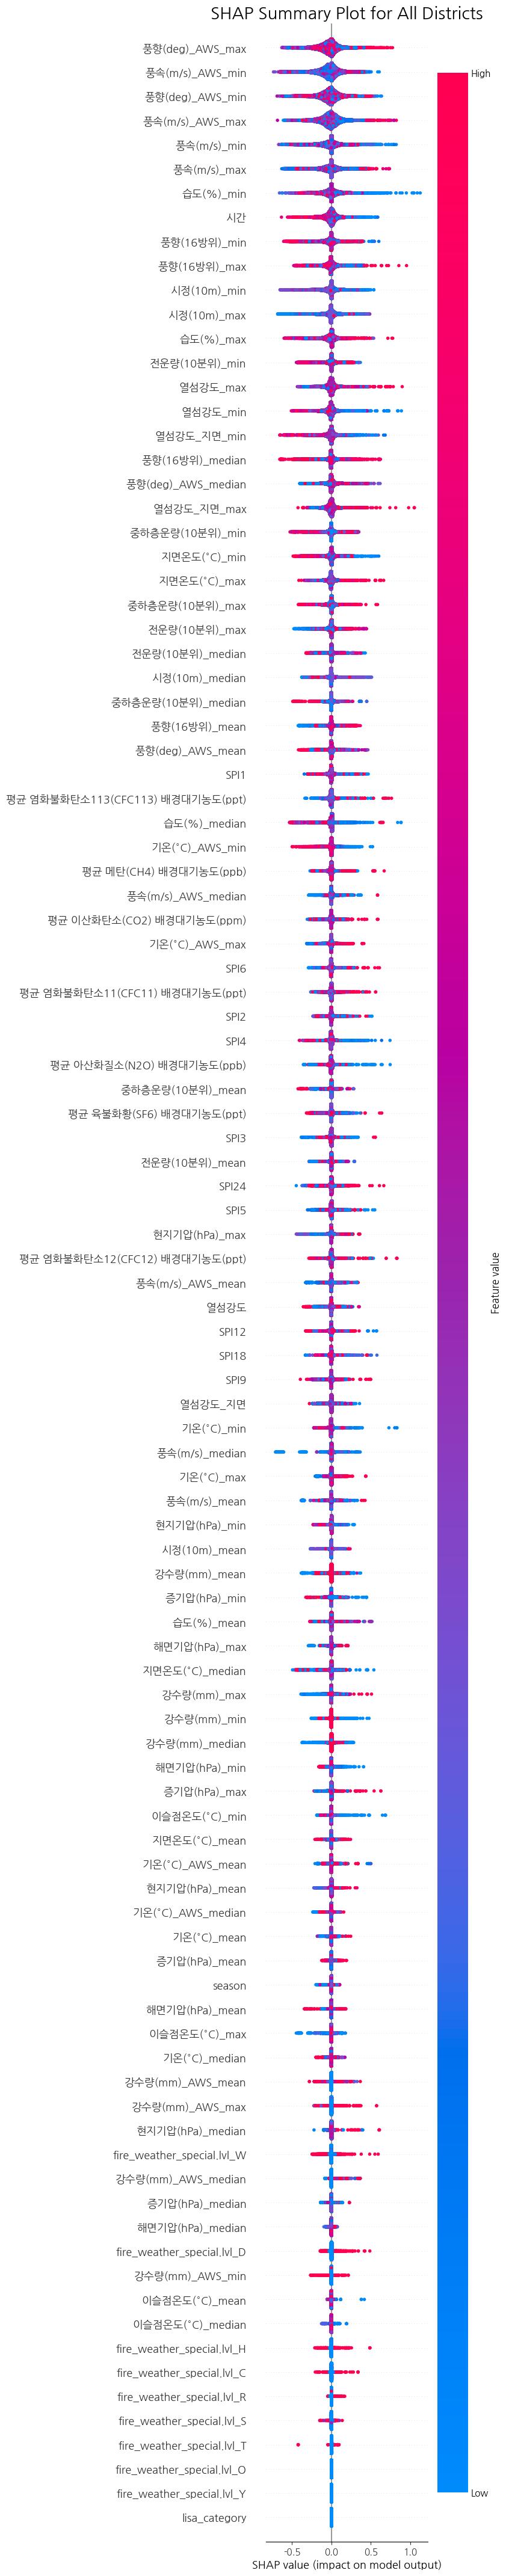

SHAP 값 계산 및 시각화 완료


In [ ]:
# max_display를 전체 변수 수로 설정
plt.figure(figsize=(20, 30))  # 그래프 크기 조정
shap.summary_plot(all_shap_values_mean, all_X_train, show=False, max_display=all_X_train.shape[1])
plt.title('SHAP Summary Plot for All Districts', fontsize=20)
plt.savefig(os.path.join(model_dir, 'shap_summary_plot_all_districts.png'))
plt.show()

print('SHAP 값 계산 및 시각화 완료')

In [ ]:
model_dir = os.path.join(PATH, 'xgboost_classification_models')

# 'fire_firefighting.district_full_'별로 데이터 분리
districts = train['fire_firefighting.district_full_'].unique()

# 변수 중요도 시각화를 위한 SHAP 값 계산 및 시각화
for district in districts:
    model_filename = os.path.join(model_dir, f'xgboost_model_{district}.json')
    if os.path.exists(model_filename):
        # 모델 로드
        model = xgb.XGBClassifier()
        model.load_model(model_filename)

        # 해당 구역의 train 데이터 분리
        train_district = train[train['fire_firefighting.district_full_'] == district]

        # 학습에 사용할 피처와 타겟 분리
        X_train = train_district.drop(columns=['target_sum', 'fire_firefighting.district_full', 'fire_firefighting.district_full_', '일시_', 'risk_level'])

        # 범주형 변수 인코딩
        for col in ['season', 'lisa_category']:
            le = LabelEncoder()
            X_train[col] = le.fit_transform(X_train[col])

        # inf 값을 NaN으로 대체하고 결측치를 처리
        X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
        X_train.fillna(0, inplace=True)  # 결측치를 0으로 대체하거나 다른 값으로 대체

        # SHAP 값 계산
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_train)

        # SHAP 요약 플롯
        shap.summary_plot(shap_values, X_train, show=False)
        plt.title(f'SHAP Summary Plot for District {district}')
        plt.savefig(os.path.join(model_dir, f'shap_summary_plot_{district}.png'))
        plt.show()

print('SHAP 값 계산 및 시각화 완료')

Output hidden; open in https://colab.research.google.com to view.